In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
adv = pd.read_csv('adv-nba-stats.csv')
adv.drop(list(adv.filter(regex = 'RANK')), axis = 1, inplace = True)
adv.drop(columns=['Unnamed: 0','GROUP_SET','GROUP_VALUE','CFID','CFPARAMS'], inplace=True)
adv = adv[adv.MIN > 10]
adv = adv[adv.FGA_PG > 3]
adv = adv[adv.GP > 20]
adv.head()
efg = adv[['PID','FGA','FGM','EFG_PCT','FGA_PG']]
adv.head()

,GP,W,L,W_PCT,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,...,TS_PCT,USG_PCT,PACE,PIE,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,PID
0,75,42,33,0.560,15.1,106.5,106.3,0.3,0.036,1.12,...,0.567,0.129,98.51,0.048,115,291,1.5,3.9,0.395,203518
1,70,26,44,0.371,19.4,105.2,108.1,-2.9,0.061,0.95,...,0.525,0.146,100.03,0.057,130,365,1.9,5.2,0.356,203112
2,76,43,33,0.566,32.7,109.8,104.8,5.0,0.051,0.69,...,0.630,0.162,100.33,0.109,448,712,5.9,9.4,0.629,203500
3,69,34,35,0.493,19.8,102.1,102.1,0.0,0.115,1.53,...,0.570,0.162,96.40,0.111,174,340,2.5,4.9,0.512,1628389
4,53,16,37,0.302,12.9,100.9,106.4,-5.5,0.066,1.43,...,0.516,0.130,98.31,0.042,65,162,1.2,3.1,0.401,201167


In [3]:
ast = pd.read_csv('assist-shots-nba-stats.csv')
ast.drop(list(ast.filter(regex = 'RANK')), axis = 1, inplace = True)
ast.drop(columns=['Unnamed: 0','CFID','CFPARAMS'], inplace=True)
uast = ast[ast.GROUP_VALUE == 'Unassisted']
ast = ast[ast.GROUP_VALUE == 'Assisted']
astfg = ast[['PID','FGM', 'FG3M']]
astfg.rename(columns={'FGM':'AST-FGM','FG3M':'AST-3PM'}, inplace=True)
astfg.head()
uastfg = uast[['PID','FGM', 'FG3M']]
uastfg.rename(columns={'FGM':'UAST-FGM','FG3M':'UAST-3PM'}, inplace=True)
ast.head()

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM,PID
0,Assisted Shot,Assisted,101,101,1.0,84,84,1.0,1.416,0,1.0,0.0,1.0,0.0,1.0,0.0,203518
2,Assisted Shot,Assisted,125,125,1.0,101,101,1.0,1.404,0,1.0,0.0,1.0,0.0,1.0,0.0,203112
4,Assisted Shot,Assisted,310,310,1.0,0,0,0.0,1.000,0,1.0,0.0,0.0,0.0,1.0,0.0,203500
6,Assisted Shot,Assisted,122,122,1.0,0,0,0.0,1.000,0,1.0,0.0,0.0,0.0,1.0,0.0,1628389
8,Assisted Shot,Assisted,49,49,1.0,25,25,1.0,1.255,0,1.0,0.0,1.0,0.0,1.0,0.0,201167


In [4]:
cld = pd.read_csv('closestD-nba-stats.csv')
cld.rename(columns={'PLAYER_ID':'PID', 'PLAYER_NAME_LAST_FIRST':'PLAYER'}, inplace=True)
cld['weighted_EFG'] = cld.FGA_FREQUENCY * cld.EFG_PCT
ocld= cld[cld.SORT_ORDER == 3]
wocld= cld[cld.SORT_ORDER == 4]
ocld = ocld[['PID','PLAYER','FGA_FREQUENCY','EFG_PCT','weighted_EFG']]
ocld.rename(columns={'FGA_FREQUENCY':'O_FGA_FREQ', 'EFG_PCT':'O_EFG', 'weighted_EFG':'wtd_O_EFG'}, inplace=True)
wocld = wocld[['PID','PLAYER','FGA_FREQUENCY','EFG_PCT','weighted_EFG']]
wocld.rename(columns={'FGA_FREQUENCY':'WO_FGA_FREQ', 'EFG_PCT':'WO_EFG', 'weighted_EFG':'wtd_WO_EFG'}, inplace=True)
wocld.head()



,PID,PLAYER,WO_FGA_FREQ,WO_EFG,wtd_WO_EFG
3,203518,"Abrines, Alex",0.445,0.587,0.261215
7,203112,"Acy, Quincy",0.559,0.589,0.329251
11,203500,"Adams, Steven",0.038,0.840,0.031920
15,1628389,"Adebayo, Bam",0.100,0.419,0.041900
19,201167,"Afflalo, Arron",0.201,0.484,0.097284


In [5]:
vtcld= cld[cld.SORT_ORDER == 1]
tcld= cld[cld.SORT_ORDER == 2]
vtcld = vtcld[['PID','PLAYER','FGA_FREQUENCY','EFG_PCT','weighted_EFG']]
vtcld.rename(columns={'FGA_FREQUENCY':'VT_FGA_FREQ', 'EFG_PCT':'VT_EFG', 'weighted_EFG':'wtd_VT_EFG'}, inplace=True)
tcld = tcld[['PID','PLAYER','FGA_FREQUENCY','EFG_PCT','weighted_EFG']]
tcld.rename(columns={'FGA_FREQUENCY':'T_FGA_FREQ', 'EFG_PCT':'T_EFG', 'weighted_EFG':'wtd_T_EFG'}, inplace=True)
vtcld.head()

,PID,PLAYER,VT_FGA_FREQ,VT_EFG,wtd_VT_EFG
0,203518,"Abrines, Alex",0.040,0.364,0.014560
4,203112,"Acy, Quincy",0.026,0.444,0.011544
8,203500,"Adams, Steven",0.229,0.671,0.153659
12,1628389,"Adebayo, Bam",0.272,0.524,0.142528
16,201167,"Afflalo, Arron",0.058,0.667,0.038686


In [6]:
sha = pd.read_csv('shot-areas-nba-stats.csv')
sha.drop(list(sha.filter(regex = 'RANK')), axis = 1, inplace = True)
sha.drop(columns=['Unnamed: 0','GROUP_SET','CFID','CFPARAMS'], inplace=True)
ra = sha[sha.GROUP_VALUE == 'Restricted Area']
ra = ra[['PID','FGM','PCT_AST_FGM','FGA']]
ra.rename(columns={'FGM':'RA_FGM','FGA':'RA_FGA', 'PCT_AST_FGM':'RA_PCT_AST_FGM'}, inplace=True)
ra.head()

,PID,RA_FGM,RA_PCT_AST_FGM,RA_FGA
0,203518,23,0.565,40
7,203112,21,0.857,46
14,203500,359,0.657,530
21,1628389,146,0.699,233
28,201167,11,0.818,20


In [7]:
df = efg.merge(astfg, on='PID')
df['AST_EFG'] = (df['AST-FGM'] + .5*df['AST-3PM'])/df.FGA
df['AST_EFG2'] = ((df['AST-FGM'] + .5*df['AST-3PM'])/df.FGA)- df.AST_EFG.mean()

df = df.merge(uastfg, on='PID')
df['UAST_EFG'] = (df['UAST-FGM'] + .5*df['UAST-3PM'])/df.FGA

df = df.merge(tcld, on='PID')
df = df.merge(vtcld, on=['PID','PLAYER'])
df['UAST_EFG'] = (df['UAST-FGM'] + .5*df['UAST-3PM'])/df.FGA


df = df.merge(ra, on='PID')
df['RA_EFG'] = (df['RA_PCT_AST_FGM']*df['RA_FGM'])/df.FGA
df['RA_EFG2'] = ((df['RA_PCT_AST_FGM']*df['RA_FGM'])/df.FGA) - df.RA_EFG.mean()


df = df.merge(ocld, on=['PID','PLAYER'])
df = df.merge(wocld, on=['PID','PLAYER'])
df['wtd_WO_EFG2'] = df.wtd_WO_EFG - df.wtd_WO_EFG.mean()
df['wtd_O_EFG2'] = df.wtd_O_EFG - df.wtd_O_EFG.mean()

df['EAZY_EFG'] = df[['AST_EFG', 'RA_EFG','wtd_O_EFG','wtd_WO_EFG']].mean(axis=1)

df['BIG_EFG'] = df.EFG_PCT - df.EAZY_EFG
df['BIG_EFG2'] = df.EFG_PCT - df.AST_EFG2 - df.RA_EFG2 - df.wtd_WO_EFG2 - df.wtd_O_EFG2
df['BIG_EFG3'] = df.wtd_T_EFG + df.wtd_VT_EFG

df.columns.values

array(['PID', 'FGA', 'FGM', 'EFG_PCT', 'FGA_PG', 'AST-FGM', 'AST-3PM',
       'AST_EFG', 'AST_EFG2', 'UAST-FGM', 'UAST-3PM', 'UAST_EFG',
       'PLAYER', 'T_FGA_FREQ', 'T_EFG', 'wtd_T_EFG', 'VT_FGA_FREQ',
       'VT_EFG', 'wtd_VT_EFG', 'RA_FGM', 'RA_PCT_AST_FGM', 'RA_FGA',
       'RA_EFG', 'RA_EFG2', 'O_FGA_FREQ', 'O_EFG', 'wtd_O_EFG',
       'WO_FGA_FREQ', 'WO_EFG', 'wtd_WO_EFG', 'wtd_WO_EFG2', 'wtd_O_EFG2',
       'EAZY_EFG', 'BIG_EFG', 'BIG_EFG2', 'BIG_EFG3'], dtype=object)

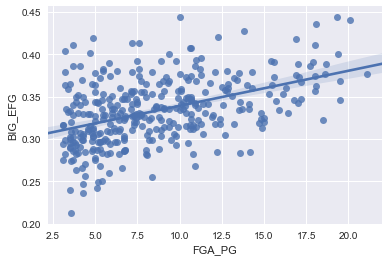

In [8]:
sns.set(color_codes=True)
ax =  sns.regplot(x='FGA_PG',y='BIG_EFG', data = df)

In [9]:
from sklearn import linear_model

X=df.FGA_PG
X = X[:, np.newaxis]
y = df.BIG_EFG
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)
pred = model.predict(X)
resid = y - pred
print(resid)
df['resid'] = resid

0     -0.031470
1     -0.069992
2      0.063175
3     -0.007035
4     -0.016354
5      0.002099
6      0.003349
7     -0.024149
8     -0.033837
9     -0.030976
10     0.051727
11    -0.000087
12     0.013770
13    -0.034464
14    -0.002090
15    -0.032333
16     0.051311
17    -0.011838
18    -0.038537
19    -0.059919
20     0.037531
21    -0.017309
22     0.007427
23     0.003968
24    -0.039258
25    -0.023359
26    -0.025363
27    -0.010407
28     0.043792
29    -0.018745
         ...   
330   -0.034670
331   -0.014170
332    0.056953
333   -0.015805
334    0.027603
335    0.013400
336   -0.039410
337   -0.004517
338   -0.018711
339    0.020650
340   -0.005055
341   -0.021939
342   -0.034444
343    0.023283
344   -0.008281
345    0.032084
346   -0.028955
347   -0.012742
348    0.007653
349   -0.000215
350   -0.023077
351   -0.017187
352    0.007715
353    0.056578
354    0.021380
355    0.012841
356    0.003529
357    0.012257
358    0.024743
359   -0.068618
Name: BIG_EFG, Length: 3

In [10]:
df.to_csv('full-df.csv')

In [11]:
df.head()

,PID,FGA,FGM,EFG_PCT,FGA_PG,AST-FGM,AST-3PM,AST_EFG,AST_EFG2,UAST-FGM,...,WO_FGA_FREQ,WO_EFG,wtd_WO_EFG,wtd_WO_EFG2,wtd_O_EFG2,EAZY_EFG,BIG_EFG,BIG_EFG2,BIG_EFG3,resid
0,203518,291,115,0.540,3.9,101,84,0.491409,0.155095,14,...,0.445,0.587,0.261215,0.118936,0.087820,0.257640,0.282360,0.254928,0.073234,-0.031470
1,203112,365,130,0.496,5.2,125,101,0.480822,0.144508,5,...,0.559,0.589,0.329251,0.186972,-0.017711,0.246782,0.249218,0.254360,0.061764,-0.069992
2,203500,712,448,0.629,9.4,310,0,0.435393,0.099079,138,...,0.038,0.840,0.031920,-0.110359,-0.027102,0.229235,0.399765,0.457549,0.528446,0.063175
3,1628389,340,174,0.512,4.9,122,0,0.358824,0.022509,52,...,0.100,0.419,0.041900,-0.100379,-0.042075,0.201067,0.310933,0.453221,0.413928,-0.007035
4,201167,162,65,0.485,3.1,49,25,0.379630,0.043315,16,...,0.201,0.484,0.097284,-0.044995,0.085420,0.190834,0.294166,0.467152,0.181543,-0.016354


In [12]:
df['UAST_PCT'] = df['UAST-FGM']/ df.FGM
df['RA_AST_PCT'] = (df['RA_PCT_AST_FGM']*df.RA_FGM)/ df.FGM
df['NON_RA_PCT'] = 1- (df.RA_FGM/ df.FGM) #1 - df.RA_AST_FGM_TOT
df['RA_UAST_PCT'] = ((1-df['RA_PCT_AST_FGM'])*df.RA_FGM)/ df.FGM
plotdf = df[['PID','PLAYER','EFG_PCT','FGA','FGA_PG','UAST_PCT','VT_FGA_FREQ','T_FGA_FREQ','O_FGA_FREQ','WO_FGA_FREQ', 'RA_AST_PCT','NON_RA_PCT','RA_UAST_PCT']]
plotdf.head()

,PID,PLAYER,EFG_PCT,FGA,FGA_PG,UAST_PCT,VT_FGA_FREQ,T_FGA_FREQ,O_FGA_FREQ,WO_FGA_FREQ,RA_AST_PCT,NON_RA_PCT,RA_UAST_PCT
0,203518,"Abrines, Alex",0.540,291,3.9,0.121739,0.040,0.154,0.360,0.445,0.113000,0.800000,0.087000
1,203112,"Acy, Quincy",0.496,365,5.2,0.038462,0.026,0.124,0.291,0.559,0.138438,0.838462,0.023100
2,203500,"Adams, Steven",0.629,712,9.4,0.308036,0.229,0.567,0.166,0.038,0.526480,0.198661,0.274859
3,1628389,"Adebayo, Bam",0.512,340,4.9,0.298851,0.272,0.472,0.155,0.100,0.586517,0.160920,0.252563
4,201167,"Afflalo, Arron",0.485,162,3.1,0.246154,0.058,0.351,0.390,0.201,0.138431,0.830769,0.030800


In [13]:
from sklearn.cluster import KMeans
X = plotdf[['UAST_PCT','RA_AST_PCT']]
model = KMeans(n_clusters=6, random_state=43, init="random").fit(X)
plotdf['GROUP'] = model.labels_


In [14]:
conditions = [
    (plotdf.GROUP == 0),(plotdf.GROUP == 1),(plotdf.GROUP == 2),(plotdf.GROUP == 3),(plotdf.GROUP == 4),(plotdf.GROUP == 5)
    ]
choices = ['Assisted Finesse','Skilled Finesse','Rim Runner','Skilled Paint Dweller','Creative Scorer','Catch and Shoot' ]
plotdf['SCORER_TYPE'] = np.select(conditions, choices, default='Typical')

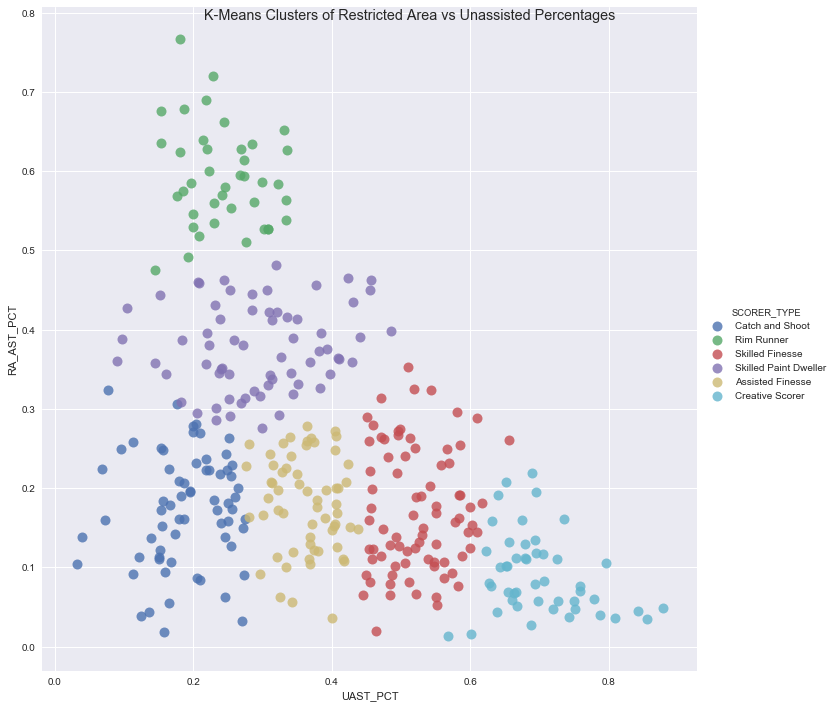

In [23]:
plt.figure(figsize=(15,15))
p = sns.lmplot(x="UAST_PCT", y="RA_AST_PCT",hue="SCORER_TYPE", data=plotdf, fit_reg=False, size=10,  scatter_kws={"s": 100})
fig = p.fig
fig.suptitle('K-Means Clusters of Restricted Area vs Unassisted Percentages')
# fig.suptitle('Restricted Area vs Unassisted Percentages')

p.savefig("efgvfga-groups.png")
# plt.scatter(X.UAST_PCT, X.RA_AST_FGM_TOT, c=model.labels_, cmap='RdYlGn')
# hue="SCORER_TYPE",

In [27]:
plotdf[plotdf.GROUP == 0]

,PID,PLAYER,EFG_PCT,FGA,FGA_PG,UAST_PCT,VT_FGA_FREQ,T_FGA_FREQ,O_FGA_FREQ,WO_FGA_FREQ,RA_AST_PCT,NON_RA_PCT,RA_UAST_PCT,GROUP,SCORER_TYPE
18,1628407,"Bacon, Dwayne",0.404,192,3.6,0.402778,0.064,0.378,0.335,0.223,0.152694,0.680556,0.166750,0,Assisted Finesse
26,203145,"Bazemore, Kent",0.500,676,10.4,0.390845,0.098,0.285,0.280,0.337,0.161979,0.640845,0.197176,0,Assisted Finesse
38,202711,"Bogdanovic, Bojan",0.565,852,10.7,0.311881,0.104,0.298,0.296,0.302,0.207921,0.628713,0.163366,0,Assisted Finesse
44,1628415,"Brooks, Dillon",0.501,772,9.4,0.364706,0.084,0.357,0.355,0.205,0.259000,0.564706,0.176294,0,Assisted Finesse
46,1628425,"Brown, Sterling",0.478,205,3.8,0.280488,0.098,0.315,0.277,0.310,0.256000,0.609756,0.134244,0,Assisted Finesse
55,201960,"Carroll, DeMarre",0.506,785,10.8,0.329231,0.105,0.333,0.347,0.215,0.169138,0.646154,0.184708,0,Assisted Finesse
64,201163,"Chandler, Wilson",0.515,631,8.5,0.370107,0.140,0.395,0.331,0.135,0.263231,0.523132,0.213637,0,Assisted Finesse
66,203546,"Clark, Ian",0.511,495,6.7,0.378378,0.087,0.287,0.222,0.404,0.184712,0.738739,0.076550,0,Assisted Finesse
90,203521,"Dellavedova, Matthew",0.457,152,4.0,0.400000,0.028,0.254,0.303,0.415,0.036400,0.872727,0.090873,0,Assisted Finesse
94,1628416,"Dorsey, Tyler",0.471,382,6.8,0.368056,0.065,0.290,0.338,0.307,0.138889,0.722222,0.138889,0,Assisted Finesse


In [308]:
plotdf.to_csv('plot-data.csv')

In [309]:
plotdf[plotdf.PLAYER == "Capela, Clint"]

,PID,PLAYER,EFG_PCT,FGA,FGA_PG,UAST_PCT,VT_FGA_FREQ,T_FGA_FREQ,O_FGA_FREQ,WO_FGA_FREQ,RA_AST_PCT,NON_RA_PCT,RA_UAST_PCT,GROUP,SCORER_TYPE
54,203991,"Capela, Clint",0.652,676,9.1,0.181406,0.252,0.566,0.13,0.052,0.766889,0.079365,0.153746,2,Rim Runner
